In [1]:
%reload_ext autotime
import pandas as pd
import plotly.io as pio
import plotly.express as px # Plotting
from tqdm import tqdm
tqdm.pandas()
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
pio.renderers.default = 'notebook'
pd.options.plotting.backend = "plotly"
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 100)

def parse(number):
    try:
        return float(number)
    except ValueError:
        return None

time: 1.39 s (started: 2025-07-22 14:44:49 +12:00)


In [2]:
df = pd.read_excel("LLM_results.xlsx")
df = df[(df.timeLeft == "closed") & (df.goal > 0)]
df.sentiment = df.sentiment.astype(str).str.split(" ").str[0].astype(float)
df.truth = df.truth.astype(str).str.split(" ").str[0].astype(float)
df.urgency = df.urgency.astype(str).str.split(" ").str[0].astype(float)
df["Target_completion"] = df.amountRaised / df.goal * 100
df

,Index,title,pitch,hero,uri,amountRaised,goal,timeLeft,action,actionUri,start,end,n_questions,location,n_donors,description,use_of_funds,whos_involved,moderated,n_updates,updates,_21,text,condition,ICD10,ICD,name,gender,age,age_group,ethnicity,urgency,sentiment,truth,notes,smiling,deservingness,attractiveness,use,region,narrative_clarity,narrative_quality,emotional_tone,image_type,face_visible,facial_expression,image_quality,Target_completion
31,31,Helping a person in need,Helping out a person in need that would drop his hat to help someone else,https://static.givealittle.co.nz/assets/hero/ed760e80-7e10-4078-b7a8-b2ec0104419b-320:False,https://givealittle.co.nz/cause/helping-a-person-in-need,1700.0,2000.0,closed,Read more,https://givealittle.co.nz/cause/helping-a-person-in-need,29 May 2025,8 Jun 2025,0,"Blenheim, Marlborough",54.0,"Tok had a serious injury while running — he tore a muscle, which led to internal bleeding and ev...",medical care where needed and general stuff around the house if needed also and utility's,"Created by, and paying to a verified bank account of,\r\nMatthew bergman on behalf of Tok H...",Page Moderated,3.0,Big thanks\n7 June 2025\nHey team huge thanks to all that have donated Tok is humbled beyond wor...,NaN,Title: Helping a person in need\nPitch: Helping out a person in need that would drop his hat to ...,Muscle tear leading to internal bleeding and infection,S86.0,"Chapter S00-T88 - Injury, poisoning and certain other consequences of external causes",Tok,Male,Indeterminate,indeterminate/unknown,Māori (based on visual appearance),80.0,70.0,90.0,"Age was not explicitly mentioned in the text, so it is marked as indeterminate. Ethnicity was in...",True,90,60,"medical expenses, travel expenses",Marlborough,80,75,grateful,portrait,True,smiling,medium,85.000000
56,56,Please help Walter 🙏 to get the veterinary care he needs.,Please help us 🙏 Walty needs bloodwork to rule out cancer 😪,https://static.givealittle.co.nz/assets/hero/a5763829-1835-4780-adc3-b2e500bd5557-320:False,https://givealittle.co.nz/cause/please-help-walter-to-get-the-veterinary-care-he,380.0,500.0,closed,Read more,https://givealittle.co.nz/cause/please-help-walter-to-get-the-veterinary-care-he,22 May 2025,1 Jun 2025,0,Otago,14.0,"Walter has been my life for 15 years, since he was a pup. It has always being just the two of us...","The money raised will go into Walts vet costsFull bloods, medication etc at the moment is quoted...","Created by, and paying to a verified bank account of,\r\nKerri Back",Page Moderated,1.0,Bloodwork done.\n23 May 2025\nThank you so much for your kind donations.\nWalty has had his bloo...,NaN,Title: Please help Walter 🙏 to get the veterinary care he needs.\nPitch: Please help us 🙏 Walty ...,Pancreatitis,K85,Chapter K00-K95 - Diseases of the digestive system,Walter,Other/unknown,indeterminate/unknown,indeterminate/unknown,Unknown (animal),80.0,70.0,90.0,"The subject is a pet dog, not a human. Age and age group cannot be determined precisely.",True,90,80,medical expenses,Otago,85,80,grateful,portrait,True,smiling,high,76.000000
59,59,Medical Treatment for Atish Lal for Coronary Artery Disease,medical Treatment,https://static.givealittle.co.nz/assets/hero/0a81d0ab-2bfc-4890-8049-b2e3017fea04-320:False,https://givealittle.co.nz/cause/medical-treatment-for-atish-lal-for-coronary,380.0,14900.0,closed,Read more,https://givealittle.co.nz/cause/medical-treatment-for-atish-lal-for-coronary,20 May 2025,6 Jun 2025,0,Auckland,6.0,"Dear Family and Friends,\nI hope this message finds you well.\nI am reaching out today with a hu...","Estimated costs for Treatment & Travel:- PTCA treatment package + home stay : $11,000 USD- Reser...",Created by\r\nShaneel Prasad \n\n\n\n\r\n Paying to a verified bank account of\r\nPriya Go...,Page Moderated,NaN,NaN,NaN,Title: Medical Treatment for Atish Lal for Coronary Artery Disease\nPitch: medical Treatment\nDe...,Coronary Artery Disease,I25.1,Chapter I00-I99 - Diseases of the circulatory syst

time: 10.2 s (started: 2025-07-22 14:44:50 +12:00)


In [3]:
df.gender.value_counts().head(20)

gender
Female                                                                                2276
Male                                                                                  1648
Other/unknown                                                                          542
Non-binary                                                                               3
Male and Female                                                                          3
Mixed (Male and Female)                                                                  2
Female (target audience is primarily women, but includes non-binary and trans men)       1
Mixed (group of individuals)                                                             1
Female (Lesa), Male (Victor)                                                             1
Other/unknown (as they are twin babies)                                                  1
Other/unknown (animal)                                                             

time: 6.86 ms (started: 2025-07-22 14:45:00 +12:00)


In [4]:
print("\n".join(df[df.gender == "Male and Female"].uri.to_list()))

https://givealittle.co.nz/cause/brook-smith-family
https://givealittle.co.nz/cause/cancellation-of-second-street-appeal
https://givealittle.co.nz/cause/help-matt-and-jiwoo-get-out-of-their-rough-patch
time: 4.98 ms (started: 2025-07-22 14:45:00 +12:00)


In [5]:
df.gender = df.gender.str.lower().where(df.gender.str.lower().isin(['male', 'female']), 'other')
df.gender.value_counts()

gender
female    2276
male      1648
other      575
Name: count, dtype: int64

time: 14.9 ms (started: 2025-07-22 14:45:00 +12:00)


In [6]:
df.ethnicity.value_counts().head(20)

ethnicity
Caucasian (assumed based on image)                 1499
European/Caucasian (based on image)                 216
Caucasian (based on image)                          213
European/New Zealander (based on image)             162
Caucasian (assumed from image)                       69
Pacific Islander (based on image)                    69
South Asian (based on image)                         69
Filipino                                             68
South Asian                                          67
Caucasian                                            61
Asian (based on image)                               56
Māori                                                53
European/New Zealander (assumed based on image)      53
European/Caucasian (assumed based on image)          53
Indian                                               49
European/New Zealand European (based on image)       45
Māori (based on visual appearance)                   44
Asian                                 

time: 7.58 ms (started: 2025-07-22 14:45:00 +12:00)


In [7]:
df.ethnicity = df.ethnicity.str.extract(r"(.+?)(?= \(|$)")
df.ethnicity.value_counts().head(20)

ethnicity
Caucasian                        1886
European/New Zealander            298
Māori                             289
European/Caucasian                281
South Asian                       184
Asian                             178
Pacific Islander                  128
Unknown                            82
Filipino                           78
European/New Zealand               73
Indian                             69
European/New Zealand European      54
Maori                              47
African                            40
Not specified                      36
Not applicable                     34
Indeterminate/Unknown              33
Mixed                              32
Latin American/Hispanic            29
Māori/Pacific Islander             28
Name: count, dtype: int64

time: 21.7 ms (started: 2025-07-22 14:45:00 +12:00)


In [8]:
df.attractiveness = df.attractiveness.apply(parse)
df[df.attractiveness >= 90]

,Index,title,pitch,hero,uri,amountRaised,goal,timeLeft,action,actionUri,start,end,n_questions,location,n_donors,description,use_of_funds,whos_involved,moderated,n_updates,updates,_21,text,condition,ICD10,ICD,name,gender,age,age_group,ethnicity,urgency,sentiment,truth,notes,smiling,deservingness,attractiveness,use,region,narrative_clarity,narrative_quality,emotional_tone,image_type,face_visible,facial_expression,image_quality,Target_completion
169,169,A Helmet for Amelia’s Bright Future,Helping baby Amelia get the orthotic helmet she needs — because every little head deserves a hea...,https://static.givealittle.co.nz/assets/hero/1767aff8-a54d-40d8-9566-b2c7017108a3-320:False,https://givealittle.co.nz/cause/a-helmet-for-amelias-bright-future,2501.0,4200.0,closed,Read more,https://givealittle.co.nz/cause/a-helmet-for-amelias-bright-future,22 Apr 2025,13 May 2025,0,"Hamilton, Waikato",75.0,"My bright baby girl, Amelia, has been diagnosed with cranial deformities. The recommended treatm...","Orthotic cranial helmet and therapy for Amelia at Orthotic House, NZ (https://www.orthotichouse....","Created by, and paying to a verified bank account of,\r\n \r\n Dil Askarova\r\n ...",Page Moderated,NaN,NaN,NaN,Title: A Helmet for Amelia’s Bright Future\nPitch: Helping baby Amelia get the orthotic helmet s...,cranial deformities,Q75.3,"Chapter Q00-Q99 - Congenital malformations, deformations and chromosomal abnormalities",Amelia,female,infant,0-14,Asian,90.0,85.0,95.0,No specific warnings or errors detected.,True,95,90.0,medical expenses,Waikato,90,85,hopeful,portrait,True,smiling,high,59.547619
3116,3118,Isla’s Hip dysplasia journey - pavlik harness,Little Isla and her hip dysplasia journey 💕,https://static.givealittle.co.nz/assets/hero/799380ba-e48c-4051-9e59-af9a016d59a4-320:False,https://givealittle.co.nz/cause/islas-hip-dysplasia-journey-pavlik-harness,92.0,800.0,closed,Read more,https://givealittle.co.nz/cause/islas-hip-dysplasia-journey-pavlik-harness,30 Jan 2023,15 Feb 2023,0,Otago,7.0,Isla is 11 weeks old and has just been diagnosed with hip dysplasia.\nShe is now in a pavlik har...,"Clothing, Car seat, fuel to get to and from specialist appointments.","Created by, and paying to a verified bank account of,_x000D_\nKerra McLellan",Page Moderated,1.0,Islas journey\n14 February 2023\nWe have been gifted some clothing!\nShare this update\n0 commen...,NaN,Title: Isla’s Hip dysplasia journey - pavlik harness\nPitch: Little Isla and her hip dysplasia j...,Hip dysplasia,M00-M99,Chapter M00-M99 - Diseases of the musculoskeletal system and connective tissue,Isla,female,11,0-14,Caucasian,80.0,60.0,90.0,No explicit mention of ethnicity in text; inferred from image.,True,95,90.0,"medical expenses, travel expenses",Otago,80,70,hopeful,portrait,True,smiling,high,11.500000
6455,6459,10for10,We want you to donate $10 for the 10% of babies by doing 10 days of 10 exercises and then nomina...,https://static.givealittle.co.nz/assets/hero/4227fe37-03cb-4c72-ada5-ab9e00f2557c-320:False,https://givealittle.co.nz/cause/10for10,2325.0,5000.0,closed,Read more,https://givealittle.co.nz/cause/10for10,15 Apr 2020,15 Jul 2020,0,Nationwide,102.0,Each year 10% of babies are born prematurely or at full-term with significant ongoing medical is...,"These funds will help us supply Essential Packs for families, Winter Warmer packs for vulnerable...","Created by The Little Miracles Trust, paying to a verified bank account of_x000D_\n _x000D_...",Page Moderated,NaN,NaN,NaN,Title: 10for10\nPitch: We want you to donate $10 for the 10% of babies by doing 10 days of 10 ex...,Premature birth or significant ongoing medical issues,"P07.9 (Prematurity, unspecified)",Chapter P00-P96 - Certain conditions originating in the perinatal period,Not specified,other,Newborn,0-14,Not specified in text; guessing from image: Likely diverse,80.0,85.0,95.0,"The text does not specify a particular individual, but rather focuses on supporting families of ...",False,90,90.0,"medical expenses, expe

time: 62 ms (started: 2025-07-22 14:45:00 +12:00)


In [9]:
df.ethnicity = df.ethnicity.replace({
    "European/Caucasian": "Caucasian",
    "European/White": "Caucasian",
    "European/White": "Caucasian",
    "European/New Zealand": "Caucasian",
    "European/New Zealander": "Caucasian",
    "European/New Zealand European": "Caucasian",
    "Māori/Pacific Islander": "Māori",
    "Asian/Pacific Islander": "Pacific Islander",
    "Maori": "Māori"
})
top_20 = df.ethnicity.value_counts().head(20)
display(top_20)
df.ethnicity = df.ethnicity.where(df.ethnicity.isin(top_20.index), "other")

ethnicity
Caucasian                     2594
Māori                          364
South Asian                    184
Asian                          178
Pacific Islander               153
Unknown                         82
Filipino                        78
Indian                          69
African                         40
Not specified                   36
Not applicable                  34
Indeterminate/Unknown           33
Mixed                           32
Latin American/Hispanic         29
Fijian                          24
Indian/Fijian                   24
East Asian                      22
Fijian/Pacific Islander         20
European/New Zealand White      19
Indeterminate                   17
Name: count, dtype: int64

time: 18.7 ms (started: 2025-07-22 14:45:00 +12:00)


In [10]:
df.condition.str.lower().value_counts().head(20)

condition
cancer                     185
breast cancer              143
gender dysphoria           137
stroke                      75
multiple sclerosis          67
none specified              54
endometriosis               45
bowel cancer                39
type 1 diabetes             37
melanoma                    37
mental health issues        36
cerebral palsy              33
terminal cancer             33
infertility                 33
chronic kidney disease      31
obesity                     31
heart attack                29
coronary artery disease     28
lung cancer                 27
ovarian cancer              27
Name: count, dtype: int64

time: 14.3 ms (started: 2025-07-22 14:45:00 +12:00)


In [11]:
df.sentiment.value_counts()

sentiment
70.0     1860
60.0      713
50.0      657
80.0      453
85.0      268
30.0      215
90.0      182
75.0       84
40.0       29
20.0       23
95.0        8
10.0        6
100.0       1
Name: count, dtype: int64

time: 6.56 ms (started: 2025-07-22 14:45:00 +12:00)


In [12]:
df.use.str.lower().value_counts().head(20)

use
medical expenses                                                         2054
medical expenses, travel expenses                                         624
travel expenses                                                           327
medical expenses, travel expenses, lost wages                             306
medical expenses, experimental therapies                                  238
medical expenses, lost wages                                              221
medical expenses, experimental therapies, travel expenses                  93
medical expenses, experimental therapies, travel expenses, lost wages      77
travel expenses, lost wages                                                43
experimental therapies                                                     42
travel expenses, medical expenses                                          31
experimental therapies, travel expenses                                    27
medical expenses, travel expenses, accommodation            

time: 14.9 ms (started: 2025-07-22 14:45:00 +12:00)


In [13]:
df.age_group = df.age_group.str.extract(r"(.+?)(?= \(|$)")
df.age_group = df.age_group.str.lower().where(df.age_group.str.lower().isin(['0-14', '15-64', '65+']), 'indeterminate/unknown')
df.age_group.value_counts()

age_group
indeterminate/unknown    2671
15-64                    1117
0-14                      504
65+                       207
Name: count, dtype: int64

time: 31.3 ms (started: 2025-07-22 14:45:00 +12:00)


In [14]:
df.gender.value_counts()

gender
female    2276
male      1648
other      575
Name: count, dtype: int64

time: 10.6 ms (started: 2025-07-22 14:45:01 +12:00)


In [15]:
df["Charity"] = df.whos_involved.str.contains(r"(Charity)", regex=False)

time: 4.8 ms (started: 2025-07-22 14:45:01 +12:00)


In [16]:
df.to_excel("LLM_results_cleaned.xlsx", index=False)

time: 7.07 s (started: 2025-07-22 14:45:01 +12:00)


In [17]:
df["met_target"] = (df.amountRaised >= df.goal).astype(int)

time: 1.57 ms (started: 2025-07-22 14:45:08 +12:00)


In [18]:
df["parsed_age"] = df.age.apply(parse)
df.parsed_age.value_counts().head(20)

parsed_age
25.0    52
30.0    51
35.0    47
17.0    43
20.0    41
28.0    39
23.0    37
6.0     34
40.0    33
27.0    33
18.0    32
4.0     32
13.0    30
3.0     28
26.0    28
38.0    27
19.0    27
14.0    27
2.0     26
50.0    26
Name: count, dtype: int64

time: 8.81 ms (started: 2025-07-22 14:45:08 +12:00)


In [19]:
df.met_target.value_counts()

met_target
0    3859
1     640
Name: count, dtype: int64

time: 3.98 ms (started: 2025-07-22 14:45:08 +12:00)


In [20]:
df.deservingness = df.deservingness.apply(parse).astype(float)
df.deservingness.describe()

count    4499.000000
mean       91.133585
std         4.859491
min        20.000000
25%        90.000000
50%        90.000000
75%        95.000000
max       100.000000
Name: deservingness, dtype: float64

time: 8.3 ms (started: 2025-07-22 14:45:08 +12:00)


In [21]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, chi2_contingency, pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

def analyze_feature_influence(df, target_col='met_target'):
    results = {}
    target = df[target_col]
    is_target_numeric = np.issubdtype(target.dtype, np.number)

    for col in df.columns:
        if col == target_col:
            continue
        
        feature = df[col]
        if feature.isnull().any() or target.isnull().any():
            continue  # skip missing for simplicity

        if is_target_numeric:
            # Target is numeric
            if np.issubdtype(feature.dtype, np.number):
                # Pearson correlation
                corr, p_value = pearsonr(feature, target)
                results[col] = {
                    'test': 'pearsonr',
                    'stat': corr,
                    'p_value': p_value
                }
            else:
                # ANOVA (feature is categorical)
                groups = [target[feature == val] for val in feature.unique()]
                stat, p_value = f_oneway(*groups)
                results[col] = {
                    'test': 'anova',
                    'stat': stat,
                    'p_value': p_value
                }
        else:
            # Target is categorical
            if not np.issubdtype(feature.dtype, np.number):
                # Chi-squared test
                contingency = pd.crosstab(df[col], target)
                stat, p, _, _ = chi2_contingency(contingency)
                results[col] = {
                    'test': 'chi2',
                    'stat': stat,
                    'p_value': p
                }

    return pd.DataFrame(results).T.sort_values('p_value')

# Usage:
# df = pd.read_csv('your_data.csv')
df.met_target = df.met_target.astype(bool)
analyze_feature_influence(df, target_col='met_target')

,test,stat,p_value
image_quality,chi2,40.932891,0.0
emotional_tone,chi2,73.290279,0.0
age_group,chi2,21.177083,0.000097
facial_expression,chi2,26.442983,0.000184
ethnicity,chi2,48.378961,0.000376
end,chi2,2186.22469,0.215375
region,chi2,104.213501,0.290067
notes,chi2,2766.80732,0.292727
start,chi2,2427.549619,0.326723
whos_involved,chi2,4433.025955,0.417108


time: 679 ms (started: 2025-07-22 14:45:08 +12:00)


In [22]:
df.smiling = df.smiling.astype(bool)

time: 854 μs (started: 2025-07-22 14:45:08 +12:00)


In [23]:
df["have_age"] = ~df.parsed_age.isna()
df[["met_target", "have_age"]].value_counts()

met_target  have_age
False       False       2509
            True        1350
True        False        440
            True         200
Name: count, dtype: int64

time: 9.29 ms (started: 2025-07-22 14:45:08 +12:00)


In [24]:
df["log_amountRaised"] = np.log1p(df.amountRaised)
df["log_amountRaised"].describe()

count    4499.000000
mean        7.422533
std         1.885026
min         0.000000
25%         6.208588
50%         7.476472
75%         8.764990
max        13.388103
Name: log_amountRaised, dtype: float64

time: 7.58 ms (started: 2025-07-22 14:45:08 +12:00)


In [25]:
df.start = pd.to_datetime(df.start, format="mixed")
df.end = pd.to_datetime(df.end, format="mixed")
df["days"] = (df.end - df.start).dt.days
df.days.describe()

count    4499.000000
mean      131.302734
std       141.845040
min         0.000000
25%        32.000000
50%        90.000000
75%       182.000000
max      1755.000000
Name: days, dtype: float64

time: 274 ms (started: 2025-07-22 14:45:08 +12:00)


In [26]:
formula = "log_amountRaised ~ days + sentiment + smiling + gender + truth + urgency + parsed_age"
logit = smf.glm(formula=formula, data=df, family=sm.families.Gamma(link=sm.families.links.Log())).fit()
display(logit.summary())
display(f"AIC (Logit): {logit.aic:.2f}")
probit = smf.glm(formula=formula, data=df, family=sm.families.Gamma(link=sm.families.links.Log())).fit()
display(probit.summary())
display(f"AIC (Probit): {probit.aic:.2f}")

/home/ubuntu/givealittle/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning:

divide by zero encountered in log

/home/ubuntu/givealittle/.venv/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning:

invalid value encountered in scalar subtract



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       log_amountRaised   No. Observations:                 1550
Model:                            GLM   Df Residuals:                     1541
Model Family:                   Gamma   Df Model:                            8
Link Function:                    Log   Scale:                        0.055701
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Tue, 22 Jul 2025   Deviance:                       239.92
Time:                        14:45:09   Pearson chi2:                     85.8
No. Iterations:                    12   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.2256      0.167     -1.354      0.176      -0.552       0.101
smiling[T.True]     0.0688      0.013      5.362      0.000       0.044       0.094
gender[T.male]      0.0359      0.013      2.858      0.004       0.011       0.060
gender[T.other]    -0.0900      0.029     -3.095      0.002      -0.147      -0.033
days                0.0002   3.91e-05      5.521      0.000       0.000       0.000
sentiment           0.0035      0.001      6.577      0.000       0.002       0.005
truth               0.0120      0.002      5.936      0.000       0.008       0.016
urgency             0.0097      0.001     12.200      0.000       0.008       0.011
parsed_age         -0.0002      0.000     -0.629      0.529      -0.001       0.000
===================================================================================
"""

'AIC (Logit): -inf'

/home/ubuntu/givealittle/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning:

divide by zero encountered in log

/home/ubuntu/givealittle/.venv/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning:

invalid value encountered in scalar subtract



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       log_amountRaised   No. Observations:                 1550
Model:                            GLM   Df Residuals:                     1541
Model Family:                   Gamma   Df Model:                            8
Link Function:                    Log   Scale:                        0.055701
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Tue, 22 Jul 2025   Deviance:                       239.92
Time:                        14:45:09   Pearson chi2:                     85.8
No. Iterations:                    12   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.2256      0.167     -1.354      0.176      -0.552       0.101
smiling[T.True]     0.0688      0.013      5.362      0.000       0.044       0.094
gender[T.male]      0.0359      0.013      2.858      0.004       0.011       0.060
gender[T.other]    -0.0900      0.029     -3.095      0.002      -0.147      -0.033
days                0.0002   3.91e-05      5.521      0.000       0.000       0.000
sentiment           0.0035      0.001      6.577      0.000       0.002       0.005
truth               0.0120      0.002      5.936      0.000       0.008       0.016
urgency             0.0097      0.001     12.200      0.000       0.008       0.011
parsed_age         -0.0002      0.000     -0.629      0.529      -0.001       0.000
===================================================================================
"""

'AIC (Probit): -inf'

time: 118 ms (started: 2025-07-22 14:45:09 +12:00)


In [27]:
df.met_target = df.met_target.astype(int)
smf.ols(formula="Target_completion ~ days + sentiment + smiling + gender + truth + urgency + parsed_age", data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Target_completion   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6002
Date:                Tue, 22 Jul 2025   Prob (F-statistic):              0.778
Time:                        14:45:09   Log-Likelihood:                -13128.
No. Observations:                1550   AIC:                         2.627e+04
Df Residuals:                    1541   BIC:                         2.632e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -943.8363    816.545     -1.156      0.248   -2545.493     657.820
smiling[T.True]    51.4457     62.877      0.818      0.413     -71.888     174.780
gender[T.male]     96.6374     61.509      1.571      0.116     -24.012     217.287
gender[T.other]    19.1091    142.511      0.134      0.893    -260.427     298.645
days               -0.0727      0.192     -0.379      0.705      -0.449       0.303
sentiment           0.4612      2.599      0.177      0.859      -4.636       5.558
truth               8.8228      9.898      0.891      0.373     -10.592      28.237
urgency             1.2515      3.907      0.320      0.749      -6.412       8.915
parsed_age          0.3826      1.567      0.244      0.807      -2.690       3.455
==============================================================================
Omnibus:                     4408.166   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        117341667.316
Skew:                          35.986   Prob(JB):                         0.00
Kurtosis:                    1349.003   Cond. No.                     6.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

time: 48 ms (started: 2025-07-22 14:45:09 +12:00)


<Axes: xlabel='amountRaised', ylabel='smiling'>

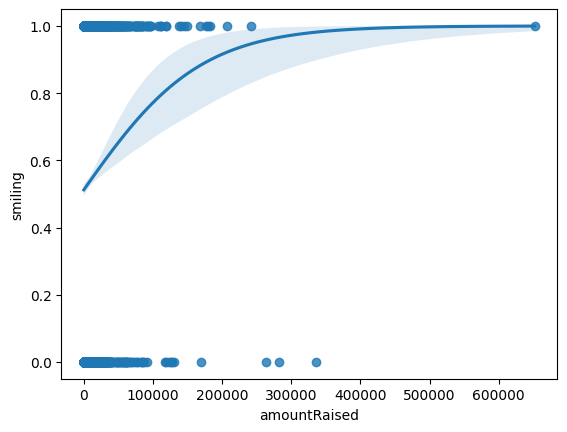

time: 5.88 s (started: 2025-07-22 14:45:09 +12:00)


In [28]:
import seaborn as sns
sns.regplot(x="amountRaised", y="smiling", data=df, logistic=True)

In [29]:
smf.ols(formula=formula, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_amountRaised   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     52.30
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           3.16e-75
Time:                        14:45:15   Log-Likelihood:                -3058.1
No. Observations:                1550   AIC:                             6134.
Df Residuals:                    1541   BIC:                             6182.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -7.7171      1.232     -6.264      0.000     -10.134      -5.300
smiling[T.True]     0.5030      0.095      5.302      0.000       0.317       0.689
gender[T.male]      0.2312      0.093      2.491      0.013       0.049       0.413
gender[T.other]    -0.6517      0.215     -3.031      0.002      -1.074      -0.230
days                0.0017      0.000      5.995      0.000       0.001       0.002
sentiment           0.0255      0.004      6.507      0.000       0.018       0.033
truth               0.0735      0.015      4.923      0.000       0.044       0.103
urgency             0.0730      0.006     12.390      0.000       0.061       0.085
parsed_age         -0.0010      0.002     -0.404      0.686      -0.006       0.004
==============================================================================
Omnibus:                       59.312   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.951
Skew:                          -0.460   Prob(JB):                     2.90e-15
Kurtosis:                       3.436   Cond. No.                     6.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

time: 63.2 ms (started: 2025-07-22 14:45:15 +12:00)


In [30]:
model = RandomForestRegressor()
cols = "sentiment + smiling + gender + truth + urgency + ethnicity".split(" + ")
X = pd.get_dummies(df[cols])
y = df["met_target"]
model.fit(X, y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


time: 572 ms (started: 2025-07-22 14:45:15 +12:00)


In [31]:
list(zip(cols, model.feature_importances_))

[('sentiment', np.float64(0.20735737033894144)),
 ('smiling', np.float64(0.11204050356227582)),
 ('gender', np.float64(0.09140590737411987)),
 ('truth', np.float64(0.215663147060733)),
 ('urgency', np.float64(0.049351978324802946)),
 ('ethnicity', np.float64(0.04748830954506516))]

time: 16.6 ms (started: 2025-07-22 14:45:16 +12:00)


In [32]:
df.region.value_counts().head(20)

region
Auckland                1331
Canterbury               555
Wellington               489
Waikato                  385
Bay of Plenty            293
Nationwide               210
Otago                    168
Northland                161
Hawke's Bay              134
International            107
Taranaki                 100
Southland                 71
Manawatu-Wanganui         63
Nelson / Tasman           62
Manawatu / Whanganui      51
Manawatu-Whanganui        51
Marlborough               37
Gisborne                  34
Nelson                    28
West Coast                24
Name: count, dtype: int64

time: 8.73 ms (started: 2025-07-22 14:45:16 +12:00)
